New shape after removing duplicates: (302, 14)
Shape of dataset: (302, 14)

First 5 rows:
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flouros

C:\Users\SATHYA TEJA\AppData\Local\Temp\ipykernel_6072\2707399654.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


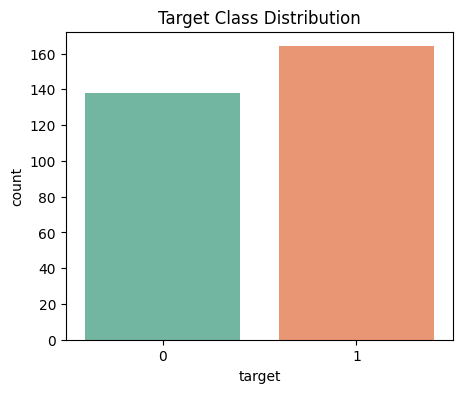

<Figure size 1200x1000 with 0 Axes>

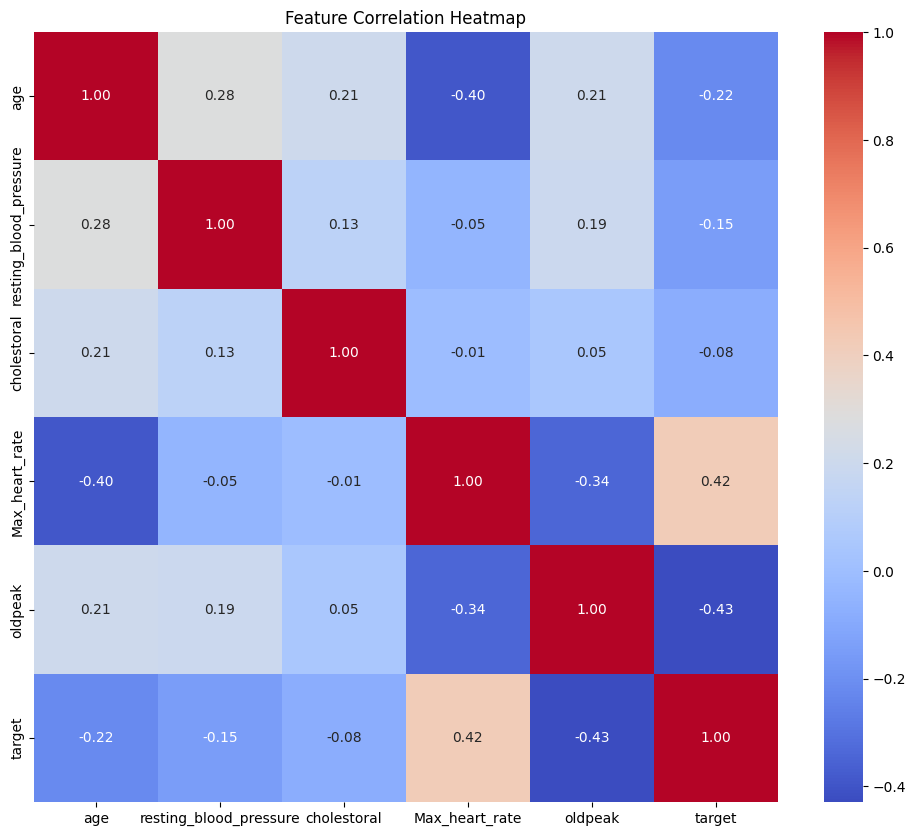

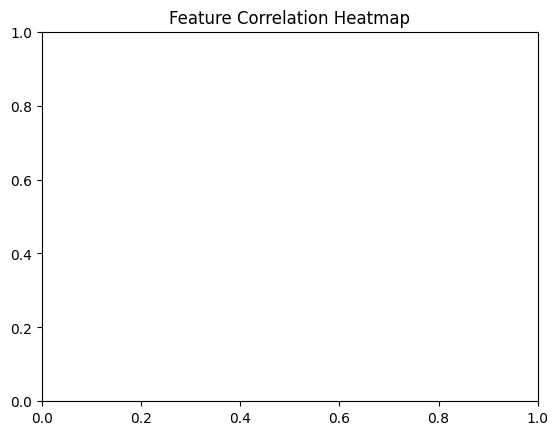

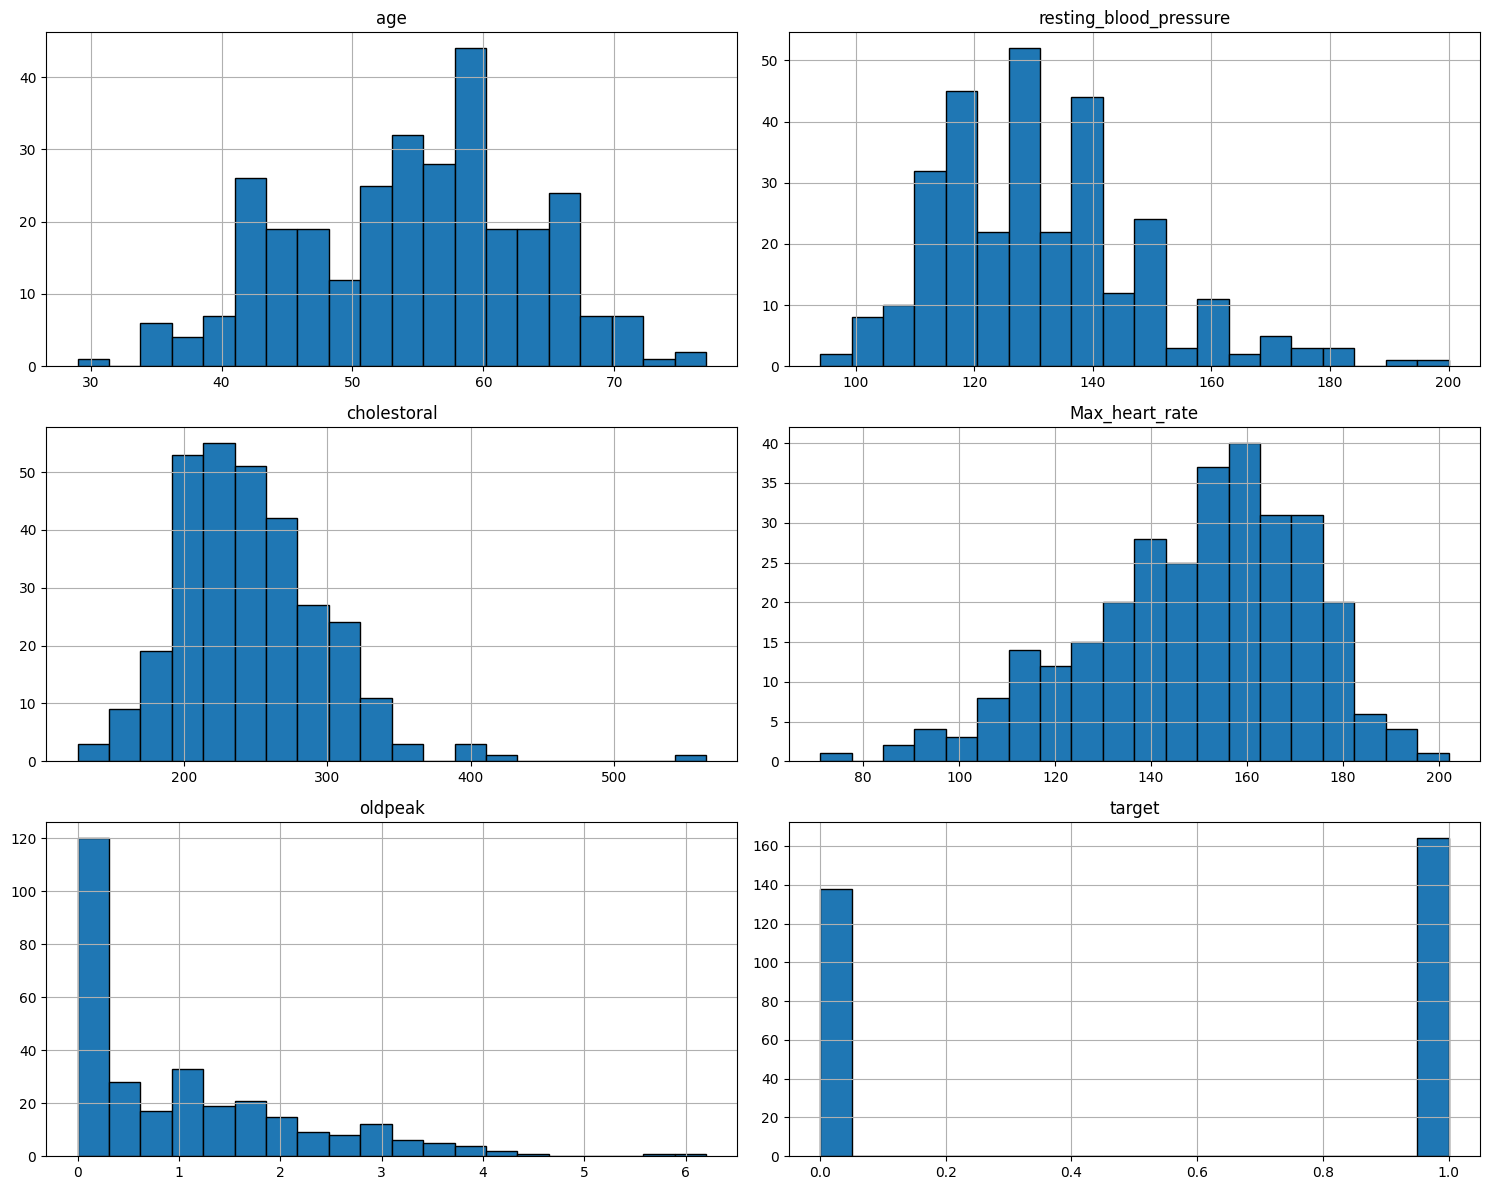

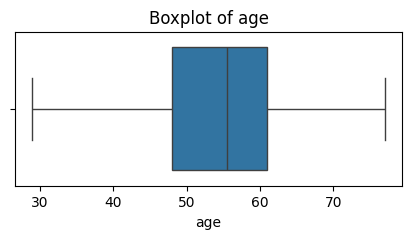

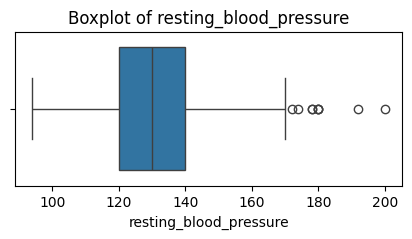

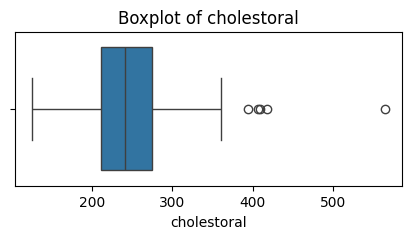

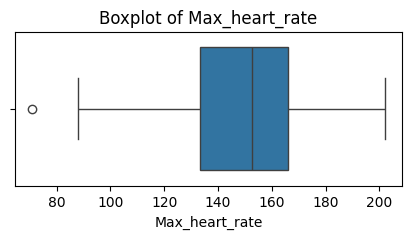

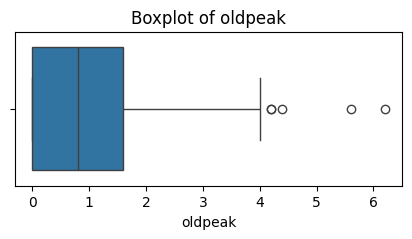

In [5]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv('../data/HeartDiseaseTrain-Test.csv')
df = df.drop_duplicates()
print("New shape after removing duplicates:", df.shape)


# 3. Basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe())

# 4. Check for null values
print("\nMissing values:\n", df.isnull().sum())

# 5. Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

# 6. Value counts of target
print("\nTarget class distribution:\n", df['target'].value_counts())

# 7. Plot target class balance
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Target Class Distribution")
plt.show()

# 8. Correlation heatmap
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

plt.title("Feature Correlation Heatmap")
plt.show()

# 9. Histograms of all features
df.hist(figsize=(15,12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# 10. Boxplots for outliers
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col != 'target':
        plt.figure(figsize=(5,2))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

# 11. Save cleaned version
df.to_csv('../data/processed_heart.csv', index=False)
